In [30]:
import threading
import pandas as pd
import tensorflow as tf
import numpy as np

In [31]:
!python --version

Python 3.10.12


In [32]:
data = pd.read_csv('/kaggle/input/test-2/test.csv')

In [33]:
data

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/17 12:01:12.984851,0.976560,tcp,93.45.141.223,2254,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
1,2011/08/17 12:01:15.616709,0.950668,tcp,84.16.60.37,64136,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
2,2011/08/17 12:01:23.209772,1.006908,tcp,94.44.197.227,3844,->,147.32.84.118,6881,S_RA,0.0,0.0,4,276,156,flow=Background-TCP-Attempt
3,2011/08/17 12:01:24.216680,1.000400,tcp,94.44.197.227,3844,->,147.32.84.118,6881,S_RA,0.0,0.0,4,276,156,flow=Background-TCP-Attempt
4,2011/08/17 12:03:27.216922,1.093291,tcp,147.32.3.51,1656,->,147.32.87.22,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087503,2011/08/17 17:12:13.795564,0.000325,udp,147.32.84.59,54880,<->,147.32.80.9,53,CON,0.0,0.0,2,211,74,flow=To-Background-UDP-CVUT-DNS-Server
2087504,2011/08/17 17:12:13.828796,0.000466,udp,147.32.86.20,53659,<->,147.32.80.9,53,CON,0.0,0.0,2,263,85,flow=To-Background-UDP-CVUT-DNS-Server
2087505,2011/08/17 17:12:13.829522,0.077026,tcp,147.32.86.20,3499,->,188.138.84.239,80,SPA_SA,0.0,0.0,10,3641,431,flow=Background-TCP-Established
2087506,2011/08/17 17:12:13.843411,0.000000,udp,87.121.84.142,23139,->,147.32.86.165,12114,INT,0.0,NaN,1,74,74,flow=Background-UDP-Attempt


In [34]:
data['Label'] = data.Label.str.contains("Botnet")
data['Label'] = data['Label'].astype(int)
data = data.drop(columns=['StartTime','Dir', 'sTos', 'dTos'])

In [35]:
data.head()

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.976560,tcp,93.45.141.223,2254,147.32.84.118,6881,S_RA,4,244,124,0
1,0.950668,tcp,84.16.60.37,64136,147.32.84.118,6881,S_RA,4,244,124,0
2,1.006908,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156,0
3,1.000400,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156,0
4,1.093291,tcp,147.32.3.51,1656,147.32.87.22,10010,S_RA,4,244,124,0


In [36]:
X = data
y = data['Label']

In [37]:
counts = data['Label'].value_counts()
print(counts)

Label
0    1902521
1     184987
Name: count, dtype: int64


In [38]:
X.head()

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.976560,tcp,93.45.141.223,2254,147.32.84.118,6881,S_RA,4,244,124,0
1,0.950668,tcp,84.16.60.37,64136,147.32.84.118,6881,S_RA,4,244,124,0
2,1.006908,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156,0
3,1.000400,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156,0
4,1.093291,tcp,147.32.3.51,1656,147.32.87.22,10010,S_RA,4,244,124,0


In [39]:
df = data
df_label0 = df[df['Label'] == 0] 
df_label1 = df[df['Label'] == 1]

df_label0 = df_label0.iloc[:250000] 

df = pd.concat([df_label0, df_label1])

Y = df['Label']
X = df.drop(columns=['Label'])

In [40]:
X

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes
0,0.976560,tcp,93.45.141.223,2254,147.32.84.118,6881,S_RA,4,244,124
1,0.950668,tcp,84.16.60.37,64136,147.32.84.118,6881,S_RA,4,244,124
2,1.006908,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156
3,1.000400,tcp,94.44.197.227,3844,147.32.84.118,6881,S_RA,4,276,156
4,1.093291,tcp,147.32.3.51,1656,147.32.87.22,10010,S_RA,4,244,124
...,...,...,...,...,...,...,...,...,...,...
2078899,0.543962,udp,147.32.84.206,1296,147.32.80.9,53,CON,2,319,70
2079021,0.000662,udp,147.32.84.206,3248,147.32.80.9,53,CON,2,622,69
2079024,0.000405,udp,147.32.84.206,3249,147.32.80.9,53,CON,2,456,69
2079032,0.218177,udp,147.32.84.206,1300,147.32.80.9,53,CON,2,242,78


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = []
for col, value in X.items():
    if value.dtype == 'object':
        categorical_features.append(col)

for col in categorical_features:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(Y)
X

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes
0,0.976560,10,66020,10411,6026,19681,159,4,244,124
1,0.950668,10,53824,52167,6026,19681,159,4,244,124
2,1.006908,10,67783,24567,6026,19681,159,4,276,156
3,1.000400,10,67783,24567,6026,19681,159,4,276,156
4,1.093291,10,14496,5579,6905,1152,159,4,244,124
...,...,...,...,...,...,...,...,...,...,...
2078899,0.543962,11,14569,2567,6002,15532,5,2,319,70
2079021,0.000662,11,14569,18198,6002,15532,5,2,622,69
2079024,0.000405,11,14569,18204,6002,15532,5,2,456,69
2079032,0.218177,11,14569,2598,6002,15532,5,2,242,78


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1)

In [43]:
np.count_nonzero(Y_train == 1)

129459

In [44]:
np.count_nonzero(Y_val == 1)

55528

In [45]:
X_train

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes
94353,0.005269,10,14601,38090,31306,20001,68,9,2194,1270
145162,0.000284,11,14601,22257,6002,15532,5,2,244,78
1309896,0.284732,11,14569,4146,6002,15532,5,2,389,70
223038,0.585655,10,14662,21019,37560,12474,142,19,4519,1136
68811,0.000281,11,14523,21833,6002,15532,5,2,214,81
...,...,...,...,...,...,...,...,...,...,...
73349,0.000350,11,14523,45290,6002,15532,5,2,214,81
1697633,55.748245,10,14569,14633,22830,19573,54,16,990,546
1369653,0.000484,11,14570,238,6002,15532,5,2,477,69
1116311,0.131957,11,14560,4224,6002,15532,5,2,305,72


In [46]:
X_val

,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes
201948,0.000349,11,14696,51435,6002,15532,5,2,314,85
42117,0.000087,11,14601,41874,6002,15532,5,2,244,78
22162,0.125370,11,14583,2905,27334,13892,5,2,251,189
13685,1865.068115,11,14583,2905,30506,17791,5,4,683,148
130982,620.749207,11,14680,1862,4336,6402,5,4,516,392
...,...,...,...,...,...,...,...,...,...,...
221812,1.018273,10,14513,5168,41006,19681,144,11,1081,572
231780,0.034653,11,14601,40340,6002,15532,5,2,223,74
65060,0.000450,11,14601,37366,6002,15532,5,2,228,74
170347,2433.586182,11,55570,9986,6589,1874,5,4,270,146


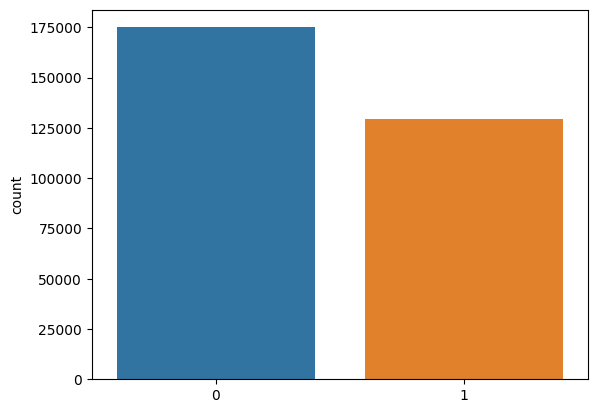

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = X_train, x = Y_train)

plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [49]:
X_train

array([[-0.33869435, -0.63112756, -0.34482718, ..., -0.00562647,
        -0.00529424, -0.00526776],
       [-0.33870039,  0.38693229, -0.34482718, ..., -0.00724204,
        -0.00574968, -0.00759171],
       [-0.33835541,  0.38693229, -0.34736665, ..., -0.00724204,
        -0.00571582, -0.00760731],
       ...,
       [-0.33870015,  0.38693229, -0.34728729, ..., -0.00724204,
        -0.00569526, -0.00760926],
       [-0.3385407 ,  0.38693229, -0.34808088, ..., -0.00724204,
        -0.00573544, -0.00760341],
       [-0.33870047,  0.38693229, -0.35101714, ..., -0.00724204,
        -0.00575669, -0.00758586]])

In [50]:
Y_train

array([0, 0, 1, ..., 1, 1, 0])

# **Transformers**

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

input_size = X_train.shape[1]

num_layers = 4
num_heads = 4
sequence_length = 1
embed_dim = 128

inputs = keras.Input(shape=(None, input_size))
x = layers.Dense(sequence_length * embed_dim, input_shape=(input_size, 1))(inputs)
x = layers.Reshape((sequence_length, embed_dim))(x)
x = layers.Dropout(0.1)(x)
for _ in range(num_layers):
    x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads, 
                                                                  value_dim=embed_dim)(x, x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Dense(embed_dim, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

transformers_model = keras.Model(inputs=inputs, outputs=outputs)

transformers_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
transformers_model.summary()
hist_transformers_model = transformers_model.fit(X_train, Y_train, epochs=150, batch_size=256, 
                                                                 validation_data=(X_val, Y_val))

y_pred_transformers_model = transformers_model.predict(X_val)
y_pred_transformers_model = y_pred_transformers_model.flatten()
y_pred_transformers_model = y_pred_transformers_model.round(2)
y_pred_transformers_model = np.where(y_pred_transformers_model > 0.5, 1, 0)
print(f"Train acc: {max(hist_transformers_model.history['accuracy'])}")
print(f"Test acc: {accuracy_score(y_pred_transformers_model,Y_val)}")
print(classification_report(Y_val, y_pred_transformers_model))
print(confusion_matrix(Y_val, y_pred_transformers_model).ravel())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, 10)]           0         []                            
                                                                                                  
 dense_6 (Dense)             (None, None, 128)            1408      ['input_2[0][0]']             
                                                                                                  
 reshape_1 (Reshape)         (None, 1, 128)               0         ['dense_6[0][0]']             
                                                                                                  
 dropout_5 (Dropout)         (None, 1, 128)               0         ['reshape_1[0][0]']           
                                                                                            

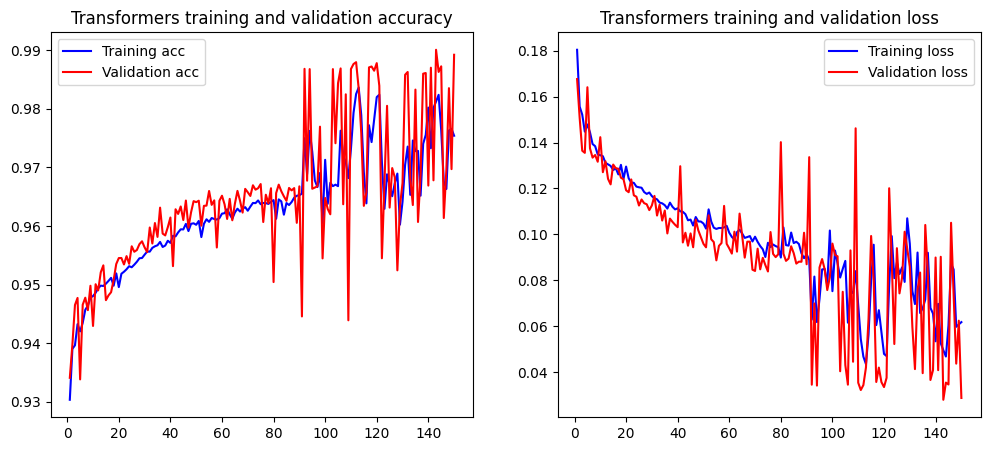

In [53]:
import matplotlib.pyplot as plt

acc = hist_transformers_model.history['accuracy']
val_acc = hist_transformers_model.history['val_accuracy']
loss = hist_transformers_model.history['loss']
val_loss = hist_transformers_model.history['val_loss']
x = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Transformers training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Transformers training and validation loss')
plt.legend()